In [8]:
import dm_event
import time

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20})

In [9]:
from lindhard import *

# Detected signal Model (Signal efficiency and ionization energy)

Let's study DM particles with $\sigma= 3·10^{-42}$ cm$^{2}$ and $m_{\chi}=5$ GeV.
We are going to suppose we have a Silicon detector of 1kg and we have collected data during 365. We want the energies that this particles are going to let on the detector. In this case we will measure the ionization energy produced by the nuclear recoils of the Silicon with DM.

In [10]:
N_p_Si, N_n_Si = 14, 14
mass_dm = 5
cross_section = 8e-43
mass_det, t_exp = 1, 365
detection = True

dm = dm_event.dm_event(N_p_Si, N_n_Si, mass_dm, cross_section, mass_det, t_exp, detection)

We are going to suppose the detector has a flat background of 0.1 dru and a threshold efficiency of 4eV in background events.

In [11]:
start_time = time.time()
bkg_flat_val = 0.1 #dru
E_eff_thres = 4e-3
dm_events = dm.simul_ev(bkg_flat_val, E_eff_thres)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.4067680835723877 seconds ---


For this DM particles we can see the number of expected signal events and background detected.

In [12]:
dm.verbose()

Number of Signal events:  14
Number of Background events:  272


And the energy spectrum.

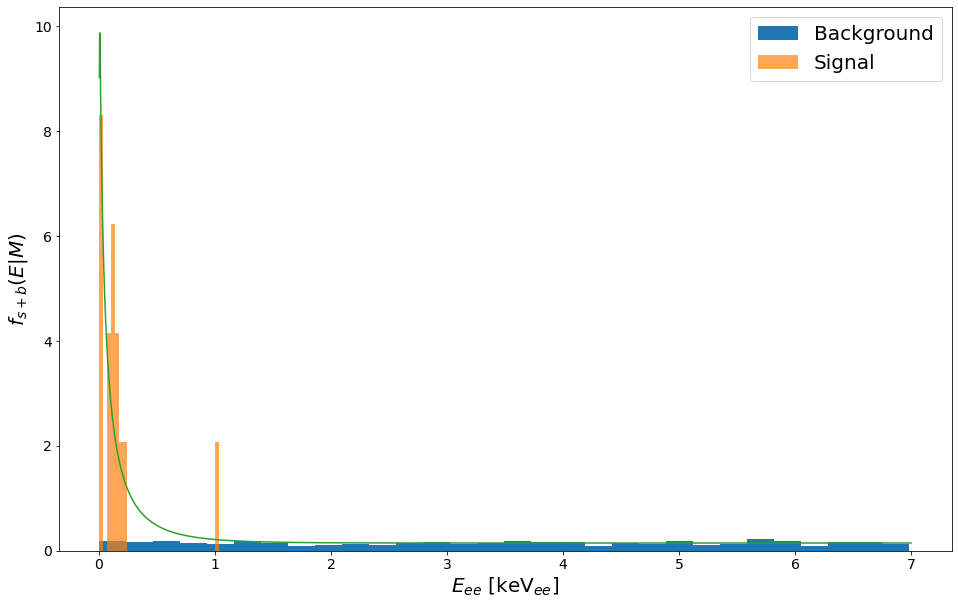

In [13]:
plt.hist(dm.bkg_ev, bins = 30, density=True, label = "Background")
plt.hist(dm.signal_ev, bins = 30, density=True, alpha = 0.7, label = "Signal")
#dm.plot_var("fb")
#dm.plot_var("fs")
#plt.loglog()
dm.plot_var("fsb")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="best")

Now we want to see how well we can distinguish the signal from the background. To do this we need to perform the likelihood of the model against the background only hypothesis likelihood.

In [14]:
dm.likelihood(deltaLL = True, sigmaEe_b = 4e-3, errors=True)

True


/home/alantero/repositories/DAMIC_DM_Sensitive_Region/likelihood.py:108: RuntimeWarning: divide by zero encountered in log
  _lnL = (s+b) - np.sum( np.log(s*fs + b*fb) )
  0%|          | 0/5000 [00:00<?, ?it/s]/home/alantero/.local/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [31:18<00:00,  2.66it/s]

95th percentil:  1.009005858977053e-42
Central vlue:  1.0085967724724447e-42
5th percentile:  1.0083356009253753e-42
95th percentil:  264.4742684748368
Central vlue:  264.47410962571064
5th percentile:  264.47388769981086



/home/alantero/.local/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]


array([42.52409786])

In [15]:
print("Likelihood Cross section: ", 10**dm.theta[0])
print("Original: ", cross_section)

Likelihood Cross section:  1.0086087490671488e-42
Original:  8e-43


In [16]:
dm.verbose()

Number of Signal events:  14
Number of Background events:  272
Likelihood parameters:  [-41.99627727 264.47409806]
Background Only-Likelihood Events :  [285.99896223]
dLL:  [11.02105036]


# Theoretical Model (No signal efficiency and nuclear recoils energy)

In [17]:
dm_t = dm_event.dm_event(14, 14, 5, 3e-42, 1, 365, False)

In [18]:
start_time = time.time()
dm_events = dm_t.simul_ev(0.1,4e-3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8133797645568848 seconds ---


Number of Signal events:  66
Number of Background events:  229


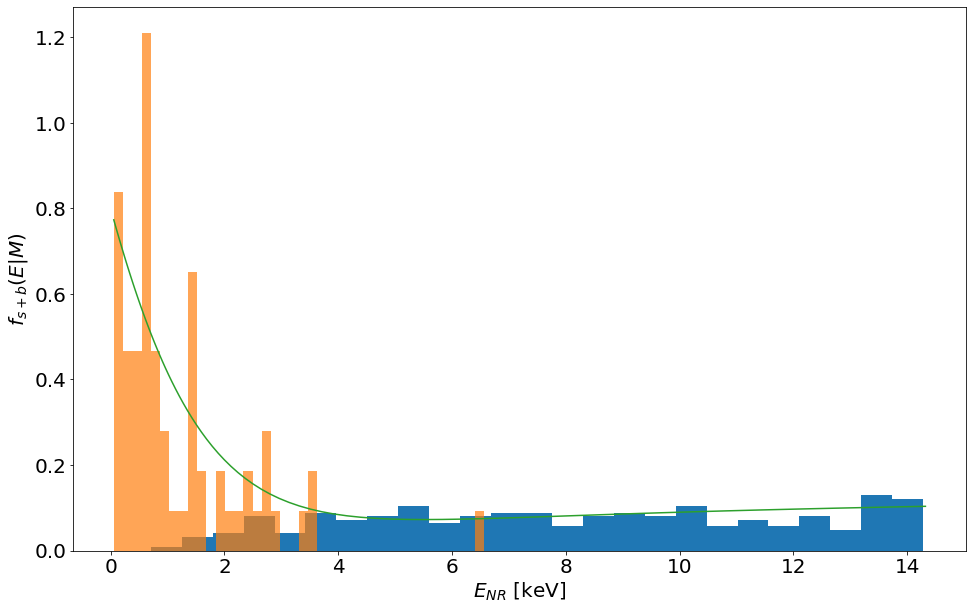

In [19]:
dm_t.verbose()
plt.hist(dm_t.bkg_ev, bins = 25, density=True)
plt.hist(dm_t.signal_ev, bins = 40, density=True, alpha = 0.7)

dm_t.plot_var("fsb")

In [20]:
dm_t.likelihood(deltaLL = True, sigmaEe_b = 4e-3)

False


array([38161.39763007])

In [21]:
dm_t.verbose()

Number of Signal events:  66
Number of Background events:  229
Likelihood parameters:  [-41.62849484 227.85581079]
Background Only-Likelihood Events :  [294.99998471]
dLL:  [-190.84942444]


In [22]:
print("Likelihood Cross section: ", 10**-41.55900126)
print("Original: ", 3e-42)

Likelihood Cross section:  2.7605698470855207e-42
Original:  3e-42


## Testing different Mass values

In [ ]:
n_sample = 100
dLL2, lnL2, xs2, b2 = [], [], [], []
start_time = time.time()
for i in range(n_sample):
    dm2 = dm_event.dm_event(14, 14, 2, 4e-42, 1, 365, True)
    dm_events = dm2.simul_ev(0.1,4e-3)
    dm2.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
    lnL2.append(dm2.lnL_sb)
    dLL2.append(dm2.dLL)
    xs2.append(10**dm2.theta[0])
    b2.append(dm2.theta[1])
print("--- %s seconds ---" % (time.time() - start_time))

xs2 = np.array(xs2)


In [ ]:
dm2.verbose()
plt.hist(xs2[xs2<1e-40], bins = 30)
xs2_m, xs2_std = np.mean(xs2[xs2<1e-40]), np.std(xs2[xs2<1e-40])
print(np.mean(np.array(dLL2)[xs2<1e-40]))
print(np.mean(xs2)+3*np.std(xs2))
print(np.mean(xs2))
print(np.mean(xs2)-3*np.std(xs2))
print(np.std(xs2))

In [ ]:
n_sample = 100
dLL3, lnL3, xs3, b3 = [], [], [], []
start_time = time.time()
for i in range(n_sample):
    dm3 = dm_event.dm_event(14, 14, 3, 8e-43, 1, 365, True)
    dm_events = dm3.simul_ev(0.1,4e-3)
    dm3.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
    lnL3.append(dm3.lnL_sb)
    dLL3.append(dm3.dLL)
    xs3.append(10**dm3.theta[0])
    b3.append(dm3.theta[1])
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
dm3.verbose()
xs3 = np.array(xs3)
plt.hist(xs3[xs3<1e-40], bins = 30)
xs3_m, xs3_std = np.mean(xs3[xs3<1e-40]), np.std(xs3[xs3<1e-40])
print(np.mean(np.array(dLL3)[xs3<1e-40]))
print(np.mean(xs3)+3*np.std(xs3))
print(np.mean(xs3))
print(np.mean(xs3)-3*np.std(xs3))
print(np.std(xs3))

In [ ]:
n_sample = 100
dLL4, lnL4, xs4, b4 = [], [], [], []
start_time = time.time()
for i in range(n_sample):
    dm4 = dm_event.dm_event(14, 14, 4, 7e-43, 1, 365, True)
    dm_events = dm4.simul_ev(0.1,4e-3)
    dm4.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
    lnL4.append(dm4.lnL_sb)
    dLL4.append(dm4.dLL)
    xs4.append(10**dm4.theta[0])
    b4.append(dm4.theta[1])
print("--- %s seconds ---" % (time.time() - start_time))
xs4 = np.array(xs4)

In [ ]:
dm4.verbose()
xs4 = np.array(xs4)
plt.hist(xs4, bins = 30)
xs4_m, xs4_std = np.mean(xs4[xs4<1e-40]), np.std(xs4[xs4<1e-40])
print(np.mean(np.array(dLL4)[xs4<1e-40]))
print(np.mean(xs4)+3*np.std(xs4))
print(np.mean(xs4))
print(np.mean(xs4)-3*np.std(xs4))
print(np.std(xs4))

In [ ]:
dm2 = dm_event.dm_event(14, 14, 2, 2e-42, 1, 365, True)
dm2.verbose()
dm_events = dm2.simul_ev(0.1,4e-3)
dm2.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
dm2.verbose()

In [ ]:
dm3 = dm_event.dm_event(14, 14, 3, 8e-43, 1, 365, True)
dm3.verbose()
dm_events = dm3.simul_ev(0.1,4e-3)
dm3.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
dm3.verbose()

In [ ]:
dm4 = dm_event.dm_event(14, 14, 4, 4e-43, 1, 365, True)
dm4.verbose()
dm_events = dm4.simul_ev(0.1,4e-3)
dm4.likelihood(deltaLL = True, sigmaEe_b = 4e-3)
dm4.verbose()

In [ ]:
import dm_event
dm1 = dm_event.dm_event(14, 14, 1, 1e-41, 1, 365, True, Eemin = 1e-4)
dm1.verbose()
dm_events = dm1.simul_ev(0.1,4e-10)
dm1.likelihood(deltaLL = True, sigmaEe_b = 4e-10)
dm1.verbose()

In [ ]:
plt.hist( dm1.signal_ev, bins = 30)
dm1_theo = dm_event.dm_event(14, 14, 1, 1e-41, 1, 365, False, Eemin = 1e-4)
#dm1_theo.plot_var("fs", Eemin = 1e-8)
dm1.plot_var("fs")
from lindhard import lindhard_derivative
plt.loglog(dm1.E_space_dist, dm1_theo.dRdE_dist*lindhard_derivative(dm1_theo.E_space_dist))
plt.show()

In [ ]:
dm1.plot_var("inv_cdf", step = 10)
dm2.plot_var("inv_cdf", step = 10)
plt.show()

In [ ]:
m = [1,2,3,4,5]
xs = [1e-41,2e-42, 8e-43, 4e-43, 8e-43]
plt.plot(m,xs,'--', color = "b")
plt.ylim(1e-45,1e-38)
plt.xlabel(r"Dark Matter Mass [GeV/c$^2$]")
plt.ylabel(r"Dark Matter-nucleon $\sigma_{SI}$ [cm$^2$]")
plt.xlim(0.3,10)
plt.xticks([0.5,1,5,10])
plt.grid(True, 'both')
plt.yscale("log")
#plt.xscale("log")
plt.minorticks_off()


In [ ]:
m = [2,3,4,5]
dLL =[5.15599181, 7.4441312, 8.38835777, 6.63]
plt.plot(m,dLL,'--', color = "b")
plt.xlabel(r"Dark Matter Mass [GeV/c^2]")
plt.ylabel(r"$\Delta \mathcal{LL}$")
plt.xlim(0.3,10)
plt.xticks([0.5,1,5,10])
plt.grid(True, 'both')
plt.minorticks_off()